In [7]:
import numpy as np
import pandas as pd
from uncertainties import ufloat


import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fmin

# 1. Messung des externen Magnetfelds

In [8]:
df = pd.read_csv('data/magnetfeld_messung.csv')
df 
#x in mm
#B in mT

,x,B
0,70,1
1,75,5
2,80,2
3,85,95
4,90,257
5,92,317
6,94,362
7,96,387
8,98,399
9,100,401


In [41]:
ind_start = 3
ind_end = 16

In [42]:
def f(x,a,b,c):
    return a*x**2 + b*x + c

In [43]:
param, cov = curve_fit(f, df['x'][ind_start:ind_end], df['B'][ind_start:ind_end])

name_list = ['a', 'b', 'c']

for param_name, value, var in zip(name_list, param, np.diag(cov)):
    print(f'{param_name} = {value:.2}+-{np.sqrt(var):.2}')

a = -1.4+-0.038
b = 2.9e+02+-7.6
c = -1.4e+04+-3.8e+02


In [44]:
x_lin = np.linspace(df['x'][ind_start], df['x'][ind_end-1], 1000)

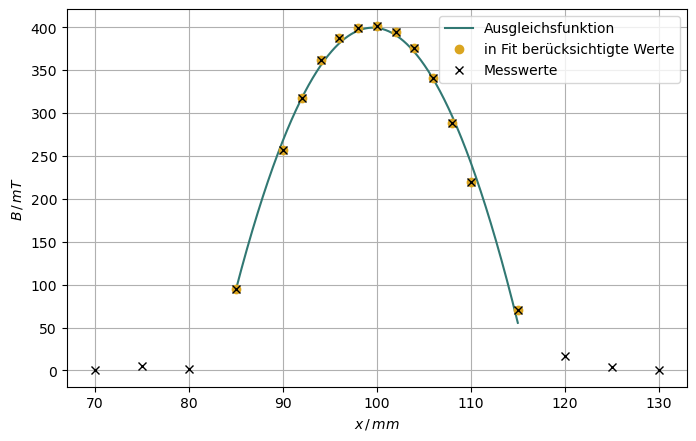

In [45]:
plt.figure(figsize=(8,5), dpi=100)
plt.plot(x_lin, f(x_lin, *param), label='Ausgleichsfunktion', color='#317873')
plt.plot(df['x'][ind_start:ind_end], df['B'][ind_start:ind_end], 'o', color='#daa520', label='in Fit berücksichtigte Werte')
plt.plot(df['x'], df['B'], 'x', color='k', label='Messwerte')

plt.grid()
plt.legend()
plt.ylabel(r'$B \,/\, mT$')
plt.xlabel(r'$x \,/\, mm$')

plt.savefig('../figure/magnetfeld.pdf')
plt.show()

In [46]:
def f_mask(x):
    return -f(x, *param)

In [49]:
a = ufloat(param[0], np.sqrt(cov[0,0]))
b = ufloat(param[1], np.sqrt(cov[1,1]))
c = ufloat(param[2], np.sqrt(cov[2,2]))

In [52]:
x_max = fmin(f_mask, 100)[0]
B_max = f(x_max, a, b, c)

print()
print('Max. Magnetfeld:')
print(f'x = {x_max:.2f}mm')
print(f'B = {B_max:.2f}mT')


Optimization terminated successfully.
         Current function value: -399.487187
         Iterations: 17
         Function evaluations: 34

Max. Magnetfeld:
x = 99.55mm
B = 399.49+/-922.77mT
